## **Data Description**

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from **April 2005** to **September 2005.**


### **Attribute Information:**

There are 25 variables:

*   ID: ID of each client
*   LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

*   SEX: Gender (1=male, 2=female)
*   EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

*   MARRIAGE: Marital status (1=married, 2=single, 3=others)
*   AGE: Age in years

*   PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

*   PAY_2: Repayment status in August, 2005 (scale same as above)

*   PAY_3: Repayment status in July, 2005 (scale same as above)
*   PAY_4: Repayment status in June, 2005 (scale same as above)


*   PAY_5: Repayment status in May, 2005 (scale same as above)


*   PAY_6: Repayment status in April, 2005 (scale same as above)




*   BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)



*   BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
*   BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

*   BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
*   BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)


*   BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

*   PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

*   PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
*   PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)


*   PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)


*   PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

*   PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
*   default.payment.next.month: Default payment (1=yes, 0=no)

# **Project Title :**

# A Supervised Approach to Credit Card Fraud Detection Using Regression and Classification ML Models


# **Introduction**

It is important that credit card companies can recognize fraudulent credit
card transactions so that customers are not charged for items that they
did not purchase.
The Credit Card Fraud Detection Problem includes modelling past credit card
transactions with the knowledge of the ones that turned out to be fraud. This
model is then used to identify whether a new transaction is fraudulent or not. **Our aim here is to detect 100% of the fraudulent transactions while minimizing
the incorrect fraud classifications.**

## **Objective:**

The notebook is structured as follows:

*   First exploration: just to see what we have.  
*   Cleaning: time to make choices about undocumented labels
*   Feature engineering: time to be creative
*   Final result and lessons learned

In [1]:
# import basic libraries
import pandas as pd
pd.set_option("display.max_columns", 100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the data
df = pd.read_excel("default of credit card clients.xlsx")
nRow, nCol = df.shape
print(f'There are {nRow} row and {nCol} columns')

There are 30000 row and 25 columns


In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.describe()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [5]:
print("Shape of the Dataset : {}".format(df.shape))
print("Number of Columns in the Dataset : {}".format(df.shape[1]))
print("Number of Rows in the Dataset : {}".format(df.shape[0]))
print("-"*40)

Shape of the Dataset : (30000, 25)
Number of Columns in the Dataset : 25
Number of Rows in the Dataset : 30000
----------------------------------------


In [6]:
numeric_features = df.select_dtypes(include = [np.number])
categoric_features = df.select_dtypes(exclude = [np.number])
print("Number of Numerical Features : {}".format(numeric_features.shape[1]))
print("Number of Categorical Features : {}".format(categoric_features.shape[1]))
print("-"*40)

Number of Numerical Features : 25
Number of Categorical Features : 0
----------------------------------------


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [8]:
df.isnull().sum().max()

0

In [9]:
print("No Fraud", round(df['default payment next month'].value_counts()[0]/len(df) * 100,2), "% of the dataset")
print("Fraud", round(df['default payment next month'].value_counts()[1]/len(df) * 100,2), "% of the dataset")

No Fraud 77.88 % of the dataset
Fraud 22.12 % of the dataset


# **Data Cleaning**

> Indented block



In [10]:
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [11]:
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [12]:
# renaming column for our convinience
df.rename(columns = {'default payment next month': 'Isfraud'}, inplace = True)
df.rename(columns = {'PAY_0': 'PAY_1'}, inplace = True)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Isfraud
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [13]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Isfraud
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Data Transformation

## Feature Engineering

1. Payment Status Aggregation: Instead of considering repayment status for each month separately, you could aggregate them to create new features such as:

    * Average repayment status over the past few months.

    * Maximum delay in repayment over the past few months.
    
    * Number of months with delayed payments.

2. Bill Amount Difference: Calculate the difference between the bill amounts for consecutive months. This could indicate the trend in spending behavior over time.

3. Bill Amount to Credit Limit Ratio: Calculate the ratio of bill amount to the credit limit for each month. This could provide insights into the credit utilization behavior of the clients.

4. Age Binning: Instead of using age as a continuous variable, you could create age bins or categories to capture different age groups' behavior more effectively.

5. Payment Amount Ratios: Calculate ratios such as the percentage of the bill amount paid each month compared to the total bill amount or the credit limit.

6. Payment Amount Difference: Calculate the difference between the previous payment amount and the current bill amount. This could indicate how much of the outstanding balance is being paid off each month.

7. Marriage Status Encoding: Encode the marriage status variable as binary indicators (e.g., married or not married) or group categories with fewer samples into an "others" category.

8. Education Encoding: Encode the education variable into fewer categories by grouping similar levels together (e.g., graduate school and university into one category).

In [14]:
import pandas as pd


# Feature engineering

# Aggregating payment status over the past few months
df['Avg_PAY'] = df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].mean(axis=1)
df['Max_Delay'] = df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].max(axis=1)
df['Num_Delay_Months'] = (df[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']] > 0).sum(axis=1)

# Calculating bill amount differences
df['Bill_Amt_Diff_1'] = df['BILL_AMT1'] - df['BILL_AMT2']
df['Bill_Amt_Diff_2'] = df['BILL_AMT2'] - df['BILL_AMT3']
df['Bill_Amt_Diff_3'] = df['BILL_AMT3'] - df['BILL_AMT4']
df['Bill_Amt_Diff_4'] = df['BILL_AMT4'] - df['BILL_AMT5']
df['Bill_Amt_Diff_5'] = df['BILL_AMT5'] - df['BILL_AMT6']

# Calculating bill amount to credit limit ratio
df['Bill_Amt_to_Limit_Ratio'] = df['BILL_AMT1'] / df['LIMIT_BAL']

# Binning age into categories
bins = [20, 30, 40, 50, 60, 70, 80]
labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
df['Age_Group'] = pd.cut(df['AGE'], bins=bins, labels=labels, right=False)

# Encoding marriage status into binary indicators
df['Married'] = df['MARRIAGE'].apply(lambda x: 1 if x == 1 else 0)

# Encoding education into fewer categories
df['Education'] = df['EDUCATION'].replace({4: 5, 5: 5, 6: 5})  # Grouping others and unknown categories into one

# Calculating payment amount ratios
df['Payment_Ratio_1'] = df['PAY_AMT1'] / df['BILL_AMT1']
df['Payment_Ratio_2'] = df['PAY_AMT2'] / df['BILL_AMT2']
df['Payment_Ratio_3'] = df['PAY_AMT3'] / df['BILL_AMT3']
df['Payment_Ratio_4'] = df['PAY_AMT4'] / df['BILL_AMT4']
df['Payment_Ratio_5'] = df['PAY_AMT5'] / df['BILL_AMT5']
df['Payment_Ratio_6'] = df['PAY_AMT6'] / df['BILL_AMT6']

# Calculating payment amount differences
df['Payment_Amt_Diff_1'] = df['PAY_AMT1'] - df['BILL_AMT2']
df['Payment_Amt_Diff_2'] = df['PAY_AMT2'] - df['BILL_AMT3']
df['Payment_Amt_Diff_3'] = df['PAY_AMT3'] - df['BILL_AMT4']
df['Payment_Amt_Diff_4'] = df['PAY_AMT4'] - df['BILL_AMT5']
df['Payment_Amt_Diff_5'] = df['PAY_AMT5'] - df['BILL_AMT6']



# Display the updated dataframe
print(df.head())


   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0   1      20000    2          2         1   24      2      2     -1     -1   
1   2     120000    2          2         2   26     -1      2      0      0   
2   3      90000    2          2         2   34      0      0      0      0   
3   4      50000    2          2         1   37      0      0      0      0   
4   5      50000    1          2         1   57     -1      0     -1      0   

   PAY_5  PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0     -2     -2       3913       3102        689          0          0   
1      0      2       2682       1725       2682       3272       3455   
2      0      0      29239      14027      13559      14331      14948   
3      0      0      46990      48233      49291      28314      28959   
4      0      0       8617       5670      35835      20940      19146   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  \
0   

### One-hot encoding

In [15]:
# Perform one-hot encoding for 'Age_Group'
df = pd.get_dummies(df, columns=['Age_Group'], drop_first=True)


In [16]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Isfraud,Avg_PAY,Max_Delay,Num_Delay_Months,Bill_Amt_Diff_1,Bill_Amt_Diff_2,Bill_Amt_Diff_3,Bill_Amt_Diff_4,Bill_Amt_Diff_5,Bill_Amt_to_Limit_Ratio,Married,Education,Payment_Ratio_1,Payment_Ratio_2,Payment_Ratio_3,Payment_Ratio_4,Payment_Ratio_5,Payment_Ratio_6,Payment_Amt_Diff_1,Payment_Amt_Diff_2,Payment_Amt_Diff_3,Payment_Amt_Diff_4,Payment_Amt_Diff_5,Age_Group_30-40,Age_Group_40-50,Age_Group_50-60,Age_Group_60-70,Age_Group_70-80
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,-0.333333,2,2,811,2413,689,0,0,0.195650,1,2,0.000000,0.222115,0.000000,NaN,NaN,NaN,-3102,0,0,0,0,0,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0.500000,2,2,957,-957,-590,-183,194,0.022350,0,2,0.000000,0.579710,0.372856,0.305623,0.000000,0.613309,-1725,-1682,-2272,-2455,-3261,0,0,0,0,0
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0.000000,0,0,15212,468,-772,-617,-601,0.324878,0,2,0.051917,0.106937,0.073752,0.069779,0.066899,0.321564,-12509,-12059,-13331,-13948,-14549,1,0,0,0,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0.000000,0,0,-1243,-1058,20977,-645,-588,0.939800,1,2,0.042562,0.041859,0.024345,0.038850,0.036914,0.033844,-46233,-47272,-27114,-27859,-28478,1,0,0,0,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,-0.333333,0,0,2947,-30165,14895,1794,15,0.172340,1,2,0.232099,6.469312,0.279057,0.429799,0.035987,0.035492,-3670,846,-10940,-10146,-18442,0,0,1,0,0


### Data Cleaning

* Handling missing values: This involves identifying columns with missing values and deciding how to handle them. Common strategies include imputing missing values (replacing them with a statistical measure like the median, mean, or mode) or removing rows or columns with missing values.

* Dealing with infinite values: Infinite values may arise during calculations or transformations. Converting infinite values to NaNs is a common practice, as NaNs can be easily handled using imputation or removal strategies.

In [17]:
import numpy as np

# Replace infinite values with NaN
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Impute NaN values with the median of each feature
df.fillna(df.median(), inplace=True)

In [18]:
df.isnull().sum().max()

0

In [19]:
df.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Isfraud,Avg_PAY,Max_Delay,Num_Delay_Months,Bill_Amt_Diff_1,Bill_Amt_Diff_2,Bill_Amt_Diff_3,Bill_Amt_Diff_4,Bill_Amt_Diff_5,Bill_Amt_to_Limit_Ratio,Married,Education,Payment_Ratio_1,Payment_Ratio_2,Payment_Ratio_3,Payment_Ratio_4,Payment_Ratio_5,Payment_Ratio_6,Payment_Amt_Diff_1,Payment_Amt_Diff_2,Payment_Amt_Diff_3,Payment_Amt_Diff_4,Payment_Amt_Diff_5,Age_Group_30-40,Age_Group_40-50,Age_Group_50-60,Age_Group_60-70,Age_Group_70-80
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,-0.333333,2,2,811,2413,689,0,0,0.195650,1,2,0.000000,0.222115,0.000000,0.041192,0.044359,0.044631,-3102,0,0,0,0,0,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,0.500000,2,2,957,-957,-590,-183,194,0.022350,0,2,0.000000,0.579710,0.372856,0.305623,0.000000,0.613309,-1725,-1682,-2272,-2455,-3261,0,0,0,0,0
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,0.000000,0,0,15212,468,-772,-617,-601,0.324878,0,2,0.051917,0.106937,0.073752,0.069779,0.066899,0.321564,-12509,-12059,-13331,-13948,-14549,1,0,0,0,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,0.000000,0,0,-1243,-1058,20977,-645,-588,0.939800,1,2,0.042562,0.041859,0.024345,0.038850,0.036914,0.033844,-46233,-47272,-27114,-27859,-28478,1,0,0,0,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,-0.333333,0,0,2947,-30165,14895,1794,15,0.172340,1,2,0.232099,6.469312,0.279057,0.429799,0.035987,0.035492,-3670,846,-10940,-10146,-18442,0,0,1,0,0
5,6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0,0.000000,0,0,7331,-539,38214,-225,-405,1.288000,0,1,0.038820,0.031804,0.011405,0.051562,0.050971,0.039952,-54569,-55793,-18737,-18619,-19024,1,0,0,0,0
6,7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0,0.000000,0,0,-44058,-32984,-97646,59650,9059,0.735930,0,1,0.149471,0.097082,0.085392,0.037296,0.028468,0.029054,-357023,-405007,-504653,-462764,-460194,0,0,0,0,0
7,8,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0,-0.500000,0,0,11496,-221,380,380,-726,0.118760,0,2,0.031997,1.581579,0.000000,2.628959,-10.610063,2.719577,0,0,-221,740,1120,0,0,0,0,0
8,9,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0,0.333333,2,1,-2811,1988,-103,418,8074,0.080607,1,3,0.294993,0.000000,0.035679,0.081893,0.084796,0.268889,-10767,-12108,-11779,-10793,-2719,0,0,0,0,0
9,10,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0,-1.666667,-1,0,0,0,0,-13007,-905,0.000000,0,3,0.058713,0.057579,0.046863,0.041192,0.086261,0.000000,0,0,0,0,-12790,1,0,0,0,0


### Feature Scaling: 

* Scaling numerical features ensures that all features have a similar scale. MinMaxScaler is one of the scaling techniques that scales features to a specified range (commonly [0, 1]).

In [20]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
df_scaled = scaler.fit_transform(df)

# Model Building:

* After preprocessing the data, you can proceed with training your machine learning model using the preprocessed features and target variables.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

## Finalizing Features

In [22]:
features = ['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'PAY_1','PAY_2', 'PAY_3',
            'PAY_4', 'PAY_5', 'PAY_6','BILL_AMT1', 'BILL_AMT2',
            'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
            'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Avg_PAY',	'Max_Delay',	
            'Num_Delay_Months',	'Bill_Amt_Diff_1',	'Bill_Amt_Diff_2',	'Bill_Amt_Diff_3',	
            'Bill_Amt_Diff_4',	'Bill_Amt_Diff_5',	'Bill_Amt_to_Limit_Ratio',	
            'Married', 'Education',	'Payment_Ratio_1',	'Payment_Ratio_2',	'Payment_Ratio_3',	
            'Payment_Ratio_4',	'Payment_Ratio_5',	'Payment_Ratio_6',	'Payment_Amt_Diff_1',	
            'Payment_Amt_Diff_2',	'Payment_Amt_Diff_3',	'Payment_Amt_Diff_4',	'Payment_Amt_Diff_5']
X = df[features].copy()

## Train-Test Split

In [23]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, df['Isfraud'], test_size=0.2, random_state=42)

## Balancing Data with Smote

In [24]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

## Model Training:

In [25]:
# Logistic Regression
logistic_model = LogisticRegression()
logistic_model.fit(X_train_balanced, y_train_balanced)
#logistic_predictions = logistic_model.predict(X_test)

# Decision Tree
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train_balanced, y_train_balanced)
#decision_tree_predictions = decision_tree_model.predict(X_test)

# Random Forest
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_balanced, y_train_balanced)
#random_forest_predictions = random_forest_model.predict(X_test)


RandomForestClassifier()

## Model Evaluation on Train_data:

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define a function to evaluate a model
def evaluate_model(model, X_train, y_train):
    # Make predictions on the training data
    train_predictions = model.predict(X_train)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_train, train_predictions)
    precision = precision_score(y_train, train_predictions)
    recall = recall_score(y_train, train_predictions)
    f1 = f1_score(y_train, train_predictions)
    roc_auc = roc_auc_score(y_train, train_predictions)
    
    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC AUC Score:", roc_auc)

# Evaluate Logistic Regression model
print("Evaluation Metrics for Logistic Regression Model on Training Data:")
evaluate_model(logistic_model, X_train_balanced, y_train_balanced)
print("\n")

# Evaluate Decision Tree model
print("Evaluation Metrics for Decision Tree Model on Training Data:")
evaluate_model(decision_tree_model, X_train_balanced, y_train_balanced)
print("\n")

# Evaluate Random Forest model
print("Evaluation Metrics for Random Forest Model on Training Data:")
evaluate_model(random_forest_model, X_train_balanced, y_train_balanced)


Evaluation Metrics for Logistic Regression Model on Training Data:
Accuracy: 0.5752529849547572
Precision: 0.6314165497896214
Recall: 0.36156770359265406
F1 Score: 0.4598256843252077
ROC AUC Score: 0.5752529849547572


Evaluation Metrics for Decision Tree Model on Training Data:
Accuracy: 0.9945922792739733
Precision: 0.9936407844813766
Recall: 0.9955560314825721
F1 Score: 0.9945974859588125
ROC AUC Score: 0.9945922792739734


Evaluation Metrics for Random Forest Model on Training Data:
Accuracy: 0.9945922792739733
Precision: 0.9921154973096799
Recall: 0.9971087433742035
F1 Score: 0.9946058534501175
ROC AUC Score: 0.9945922792739733


## Model Evaluation on Test_data:

In [28]:
# Evaluate the models
"""models = {
    'Logistic Regression': logistic_predictions,
    'Decision Tree': decision_tree_predictions,
    'Random Forest': random_forest_predictions
}"""

"""for model_name, predictions in models.items():
    print(f"Confusion Matrix and Classification Report for {model_name}:")
    print(confusion_matrix(y_test, predictions))
    print(classification_report(y_test, predictions))
    print("="*60)"""

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define a function to evaluate a model
def evaluate_model(model, X_test, y_test):
    # Make predictions on the test data
    test_predictions = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, test_predictions)
    precision = precision_score(y_test, test_predictions)
    recall = recall_score(y_test, test_predictions)
    f1 = f1_score(y_test, test_predictions)
    roc_auc = roc_auc_score(y_test, test_predictions)
    
    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("ROC AUC Score:", roc_auc)

# Evaluate Logistic Regression model
print("Evaluation Metrics for Logistic Regression Model on Test Data:")
evaluate_model(logistic_model, X_test, y_test)
print("\n")

# Evaluate Decision Tree model
print("Evaluation Metrics for Decision Tree Model on Test Data:")
evaluate_model(decision_tree_model, X_test, y_test)
print("\n")

# Evaluate Random Forest model
print("Evaluation Metrics for Random Forest Model on Test Data:")
evaluate_model(random_forest_model, X_test, y_test)


Evaluation Metrics for Logistic Regression Model on Test Data:
Accuracy: 0.6906666666666667
Precision: 0.3144224196855776
Recall: 0.3503427265803503
F1 Score: 0.3314121037463977
ROC AUC Score: 0.568173283494997


Evaluation Metrics for Decision Tree Model on Test Data:
Accuracy: 0.714
Precision: 0.36957928802588996
Recall: 0.43488194973343486
F1 Score: 0.3995801259622113
ROC AUC Score: 0.6135365583956272


Evaluation Metrics for Random Forest Model on Test Data:
Accuracy: 0.8043333333333333
Precision: 0.5658767772511848
Recall: 0.4546839299314547
F1 Score: 0.504222972972973
ROC AUC Score: 0.6784834200542701


## Hyperparameter Tuning using Grid Search Cross-Validation for Random Forest Classifier.

In [28]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define the GridSearchCV with k-fold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=kfold, scoring='accuracy', n_jobs=-1)

# Perform the grid search
grid_search.fit(X_train_balanced, y_train_balanced)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Hyperparameters:", best_params)
print("Best Model:", best_model)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Model: RandomForestClassifier(n_estimators=300)


In [29]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier with the best hyperparameters
best_rf_classifier = RandomForestClassifier(n_estimators=300, max_depth=None, min_samples_split=2, min_samples_leaf=1)

# Train the Random Forest classifier on the balanced training data
best_rf_classifier.fit(X_train_balanced, y_train_balanced)

# Now you can use the trained Random Forest classifier (best_rf_classifier) for making predictions


RandomForestClassifier(n_estimators=300)

In [32]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Make predictions on the test set
y_pred = best_rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("roc_auc_score", roc_auc)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.8026666666666666
Precision: 0.5613701236917221
Recall: 0.44935262757044936
F1-score: 0.49915397631133673
roc_auc_score 0.6754977347367929
Confusion Matrix:
[[4226  461]
 [ 723  590]]


## PLot Learning Curve:

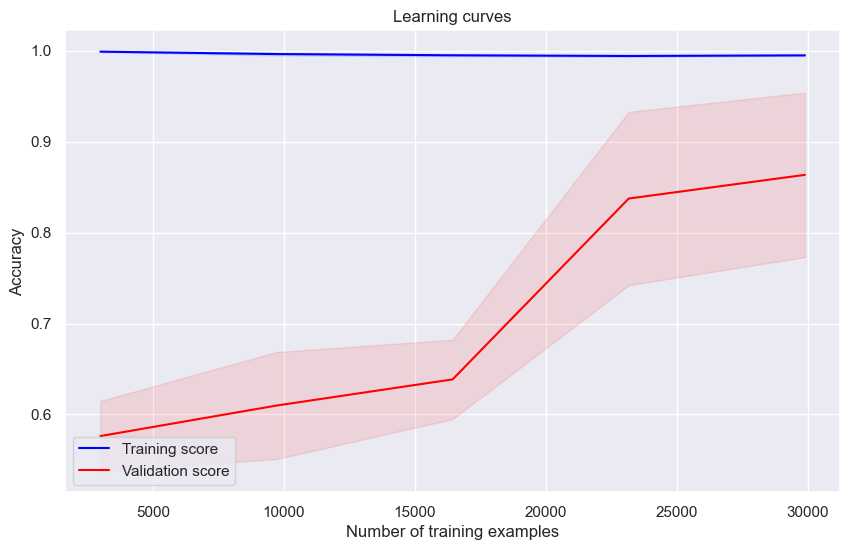

In [31]:
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier


# Define your model and parameters
model = RandomForestClassifier(n_estimators=300, max_depth=None, min_samples_leaf=1, min_samples_split=2)

# Plot learning curves
train_sizes, train_scores, test_scores = learning_curve(model, X_train_balanced, y_train_balanced, cv=5, scoring='accuracy', n_jobs=-1)

# Calculate mean and standard deviation of training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(train_sizes, test_mean, label='Validation score', color='red')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='red')
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.title('Learning curves')
plt.legend()
plt.show()


## CAP Analysis:

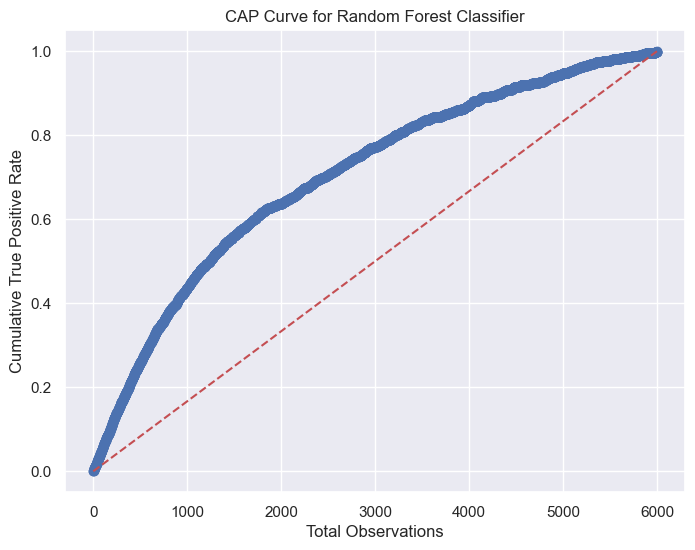

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def plot_cap_curve(y_true, y_pred_proba, title=''):
    total = len(y_true)
    class_1_count = np.sum(y_true)
    
    sorted_proba_indices = np.argsort(y_pred_proba)[::-1]
    y_sorted = y_true[sorted_proba_indices]
    x = np.arange(1, total + 1)
    y = np.cumsum(y_sorted) / class_1_count
    
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, marker='o', linestyle='-', color='b')
    plt.plot([0, total], [0, 1], linestyle='--', color='r')
    plt.xlabel('Total Observations')
    plt.ylabel('Cumulative True Positive Rate')
    plt.title(title)
    plt.grid(True)
    plt.show()

# Assuming best_rf_classifier is already trained and X_test, y_test are available
y_pred_proba = best_rf_classifier.predict_proba(X_test)[:, 1]
plot_cap_curve(y_test.values, y_pred_proba, title='CAP Curve for Random Forest Classifier')
